In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [5]:
??r2_score

## Simple Linear Regression

In [6]:
# Load the diabetes dataset

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [ ]:
# X and Y need to be two-dimensional arrays of shape (n_samples, n_features) and (n_sample, n_targets) 

In [7]:
diabetes_X.shape

(442, 10)

In [8]:
# Use only one feature

diabetes_X = diabetes_X[:, np.newaxis, 2]

In [9]:
diabetes_X.shape

(442, 1)

In [10]:
diabetes_y.shape

(442,)

In [11]:
# example: converting 1D to 2D

a = np.array([1, 2, 3, 4, 5])
print(a.shape)
print(a.reshape(-1, 1).shape)

(5,)
(5, 1)


In [12]:
# Split the data into training/testing sets

diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [13]:
# Split the targets into training/testing sets

diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

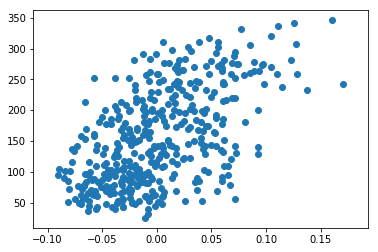

In [14]:
plt.scatter(diabetes_X_train, diabetes_y_train);

In [15]:
diabetes_X_test.shape, diabetes_X_train.shape

((20, 1), (422, 1))

In [16]:
# Create linear regression object

regr = linear_model.LinearRegression()

In [17]:
# Train the model using the training sets

regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [18]:
diabetes_y_pred = regr.predict(diabetes_X_train)

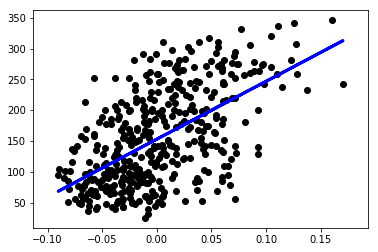

In [19]:
plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.plot(diabetes_X_train, diabetes_y_pred, color='blue', linewidth=3)

plt.show()

In [20]:
# Make predictions using the testing set

diabetes_y_pred = regr.predict(diabetes_X_test)

In [21]:
# The coefficients

print('Coefficients: \n', regr.coef_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


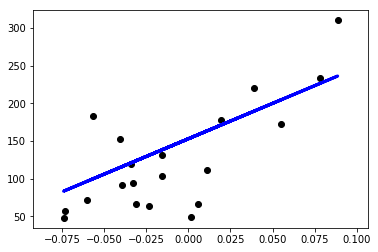

In [22]:
# Plot outputs

plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.show()


## Polynomial Regression

In [23]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

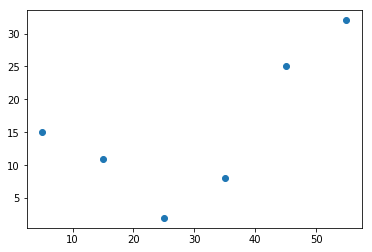

In [110]:
plt.scatter(x, y)
plt.show()

In [24]:
x.shape

(6, 1)

In [74]:
# degree can be greater than 2

transformer = PolynomialFeatures(degree=2, include_bias=False)

In [75]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [76]:
x_ = transformer.transform(x)

In [77]:
# Can replace the above three statements with
# x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [78]:
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [111]:
model = linear_model.LinearRegression()
model.fit(x_, y)

LinearRegression()

In [80]:
r_sq = model.score(x_, y)

print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498563
intercept: 21.37232142857144
coefficients: [-1.32357143  0.02839286]


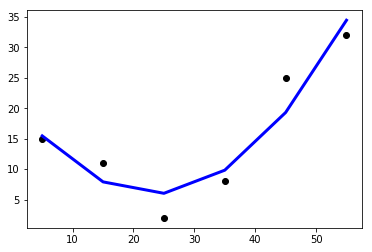

In [81]:
plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x_), color='blue', linewidth=3)

plt.show()

## Underfitting / Overfitting

In [82]:
# Using linear fit for above example (Under-fitting)

regr.fit(x, y)

y_pred = regr.predict(x)

# The coefficients

print('Coefficients: \n', regr.coef_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))

Coefficients: 
 [0.38]
Mean squared error: 61.47
Coefficient of determination: 0.41


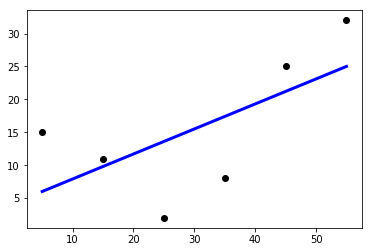

In [83]:
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)

plt.show()

coefficient of determination: 0.8908516262498563
intercept: 21.37232142857144
coefficients: [-1.32357143  0.02839286]


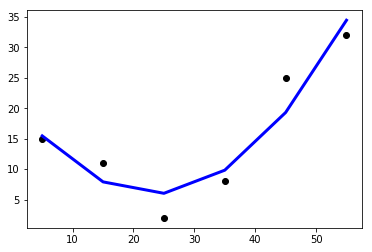

In [92]:
# Over-fitting

x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

model = linear_model.LinearRegression().fit(x_, y)

r_sq = model.score(x_, y)

print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('coefficients:', model.coef_)

plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x_), color='blue', linewidth=3)

plt.show()


## Train/Test split to avoid under/over fitting

In [99]:
transformer = PolynomialFeatures(degree=5, include_bias=False)

transformer.fit(diabetes_X_train)

PolynomialFeatures(degree=5, include_bias=False)

In [100]:
dia_X_train_trans = transformer.transform(diabetes_X_train)

In [101]:
dia_X_test_trans = transformer.transform(diabetes_X_test)

In [102]:
model = linear_model.LinearRegression().fit(dia_X_train_trans, diabetes_y_train)

In [103]:
dia_y_pred = model.predict(dia_X_test_trans)

In [104]:
# The coefficients

print('Coefficients: \n', regr.coef_)

# The mean squared error

print('Mean squared error of test: %.2f'
      % mean_squared_error(diabetes_y_test, dia_y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination of test: %.2f'
      % r2_score(diabetes_y_test, dia_y_pred))

Coefficients: 
 [0.38]
Mean squared error of test: 2730.18
Coefficient of determination of test: 0.43


In [105]:
r2_list_test = list()
r2_list_train = list()

for i in range(1, 12):
    transformer = PolynomialFeatures(degree=i, include_bias=False)
    transformer.fit(diabetes_X_train)
    dia_X_train_trans = transformer.transform(diabetes_X_train)
    dia_X_test_trans = transformer.transform(diabetes_X_test)
    model = linear_model.LinearRegression().fit(dia_X_train_trans, diabetes_y_train)
    dia_y_pred = model.predict(dia_X_test_trans)
    r2_list_test.append(r2_score(diabetes_y_test, dia_y_pred))
    dia_y_pred = model.predict(dia_X_train_trans)
    r2_list_train.append(r2_score(diabetes_y_train, dia_y_pred))

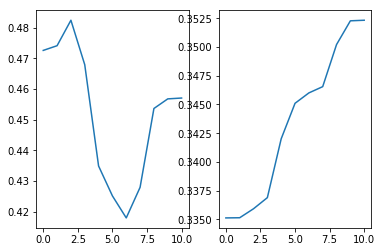

In [107]:
plt.subplot(1,2,1)
plt.plot(r2_list_test)
plt.subplot(1,2,2)
plt.plot(r2_list_train)
plt.show()

In [108]:
r2_list_test = np.array(r2_list_test)
np.argmax(r2_list_test)

2

## That's it folks